# Introduction to Inference in Astronomy: Fitting Models to Data

Today, we'll explore what data science entails, the importance of model fitting and how we can apply it in astronomical data analysis, and the role of inference in drawing meaningful conclusions from our observations.

Inference refers to the process of comparing models to data and is a fundamental aspect of data analysis in astronomy. In the context of astronomy, model fitting enables us to extract valuable information about the physical properties of objects (like stars, galaxies, exoplanets, etc) by comparing observational data to theoretical models or mathematical functions. 

This notebook will cover two of the most fundamental models with use in astronomy: lines and gaussian curves. 

## Linear Regression:

Linear regression just means "let's fit a line"! It's a statistical method used to model the relationship between a dependent variable (often denoted as 'y') and one or more independent variables (often denoted as 'x'). It assumes that the relationship between the variables can be described by a linear equation, such as a straight line in the case of simple linear regression. Like an inference task, the goal of linear regression is to find the best-fitting line that minimizes the differences between the observed values and the values predicted by the model.

For the simpliest case of a straight line, aka a first order polynomial, we can describe our model using two parameters: **slope** and **intercept**. 

### How can we implement this in python? 

`np.polyfit` is a function in NumPy used for polynomial regression, which fits a polynomial curve to a set of data points. In the context of linear regression, `np.polyfit` fits a polynomial of degree 1 (a straight line) to the given data points by minimizing the sum of squared errors between the observed and predicted values. This function returns the coefficients of the polynomial that best fits the data, allowing us to determine the slope and intercept of the regression line.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fake data for demonstration
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.1, 3.9, 5.8, 8.2, 10.1])

In [6]:
# Fit a straight line (polynomial of degree 1) to the data
coefficients = np.polyfit(x, y, deg=1)
coefficients

array([ 2.03, -0.07])

In [7]:
# Extract the slope (m) and intercept (b) from the coefficients
slope, intercept = coefficients
# note: you can do this more efficiently by just writing: slope, intercept = np.polyfit(x, y, deg=1),
# but I wanted to print coefficients to show the actual output of polyfit

# Print the equation of the fitted line
print(f"Fitted line equation: y = {slope:.2f}x + {intercept:.2f}")

Fitted line equation: y = 2.03x + -0.07


So we have managed to fit a line to our data! Horray! Now let's plot both the data and model:

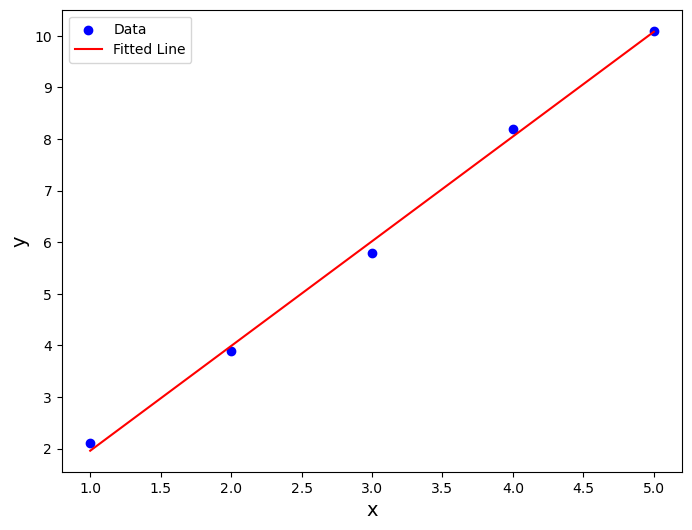

In [8]:
# Generate points along the fitted line for plotting
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept

# Plot the data points and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="Data")
plt.plot(x_fit, y_fit, color="red", label="Fitted Line")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.show()

## A practical astronomy application: The M-sigma Relation

The M-sigma relation, also known as the black hole mass-velocity dispersion relation, is an empirical correlation observed between the mass of supermassive black holes ($M_{bh}$) at the centers of galaxies and the velocity dispersion ($\sigma$) of stars in the bulges of those galaxies. This relationship suggests that there is a tight connection between the properties of galaxies and the central black holes they host. Specifically, galaxies with larger velocity dispersions tend to harbor more massive black holes at their centers.

The M-sigma relation has profound implications for our understanding of galaxy formation and evolution, as well as the co-evolution of galaxies and their central black holes. It provides valuable insights into the mechanisms governing the growth and regulation of supermassive black holes, the role of feedback processes in galaxy evolution, and the relationship between the properties of galactic bulges and their central black holes.


::::{admonition} Exercise 1: Linear Regression for the M-sigma Relation
:class: tip

We will apply the concept of linear regression to analyze the M-sigma relation using observational data. We have provided a dataset containing measurements of black hole masses (M_bh), velocity dispersions (sigma), and their associated uncertainties. Your task is to perform linear regression to fit both the black hole mass as a function of velocity dispersion (M_bh vs. sigma) and velocity dispersion as a function of black hole mass (sigma vs. M_bh).

1. **Load the Data**: Read the `m-sigma` dataset sent in Slack into a Pandas dataframe and inspect the first few rows to familiarize yourself with the structure of the data.

2. **Plot the Data**: Create a scatter plot of the log of the black hole mass (log(M_bh)) against velocity dispersion (sigma), with error bars representing the uncertainties in both quantities.

3. **Perform Linear Regression**:
   - Fit a linear regression model to the data, treating M_bh as the dependent variable (y) and sigma as the independent variable (x) and incorporate the errors on sigma in the fit
   - Fit another linear regression model, treating sigma as the dependent variable (y) and M_bh as the independent variable (x) and incorporate the errors on M_bh in the fit.
     :::{hint} Hint: Incorporating Errors
     :class: dropdown
     Look into the weights keyword argument for `np.polyfit` to figure out how to incorporate errors. 
     :::

4. **Visualize the Results**: Plot the regression lines along with the data points to observe how well they fit the M-sigma relation. Compare the slopes and intercepts of the regression lines for both fits. 

:::: 

# So, how can we incapsulate uncertainty in the fitted parameters? 

As we can see, fitting the dispersion as a function of black hole mass, weighting by the uncertainties in velocity dispersion (and ignoring uncertainties in M_bh) produced a different fit! It should be clear then that we are not done — and that neither of these fits are likely well characterized in terms of the uncertainties in the data.

There are many ways to deal with this problem, including higher-complexity fits that include uncertainties in both x and y. One different, but conceptually simpler way we can estimate our uncertainty in the parameters of the fit (slope and intercept) is via **bootstrap resampling or perturbative re-fitting**.

## Bootstrap Resampling 

Bootstrapping is a resampling technique used in statistics to estimate the sampling distribution of a statistic by repeatedly sampling with replacement from the observed data. It is particularly useful when the underlying population distribution is unknown or difficult to model. 

1. Sample Creation: Bootstrapping starts with the creation of multiple bootstrap samples by randomly selecting observations from the original dataset with replacement. This means that each observation in the original dataset has the same chance of being selected for each bootstrap sample, and some observations may be selected multiple times while others may not be selected at all.
2. Statistical Estimation: After creating the bootstrap samples, the statistic of interest (e.g., mean, median, standard deviation, regression coefficient) is calculated for each bootstrap sample. This results in a distribution of the statistic across the bootstrap samples, known as the bootstrap distribution. In our case, this would be fitting our line to the data and seeing how much the paramters (slope and intercept) change for each fit. Now, we have some way of expressing uncertainty in our fitted parameters! 
![](bootstrap_resampling.png)
On Wednesday, we will start with an exercise using bootstrapping to estimate the uncertainty on our fit for the M-sigma relation! 

# What about fitting arbitrary functions? 

Everything we've done so far pertains to fitting polynomials to data, but what if you want to fit a differnt type of function (like a Gaussian distribution)? We will go into this on Wednesday! 